# How well do jobs and skills pay for Data Analysts?

In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Filter DataFrame to include only Data Analyst jobs located in Poland & drop rows where the 'salary_year_avg' value is missing (NaN)
df_PL = df[df['job_country'] == 'Poland'].dropna(subset='salary_year_avg')

In [5]:
# Top 6 most common job titles in Poland
job_titles = df_PL['job_title_short'].value_counts().index[:6].tolist()

In [6]:
# Filter rows with top 6 job titles
df_PL_top6 = df_PL[df_PL['job_title_short'].isin(job_titles)]

In [7]:
# Order job titles by median salary (highest to lowest)
job_order = df_PL_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

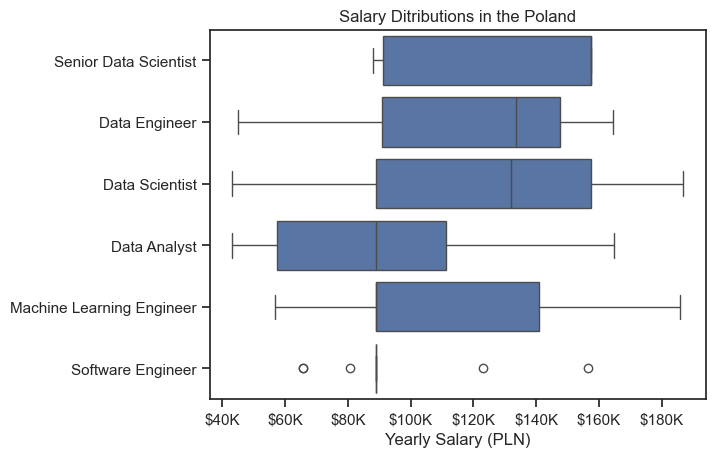

In [8]:
sns.boxplot(data=df_PL_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Ditributions in the Poland')
plt.xlabel('Yearly Salary (PLN)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

Investigate Median Salary Vs Skill for Data Analysts

In [9]:
# Filter Data Analyst jobs in Poland
df_DA_PL = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')].copy()

# Drop rows with missing salary
df_DA_PL = df_DA_PL.dropna(subset=['salary_year_avg'])

# Split job skills lists into separate rows
df_DA_PL = df_DA_PL.explode('job_skills')

# Top 10 most common skills with salary stats, sorted by median pay
df_DA_skills = df_DA_PL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

# Top 10 highest paying skills, sorted by median salary
df_DA_top_pay = df_DA_PL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10).sort_values(by='median', ascending=False)


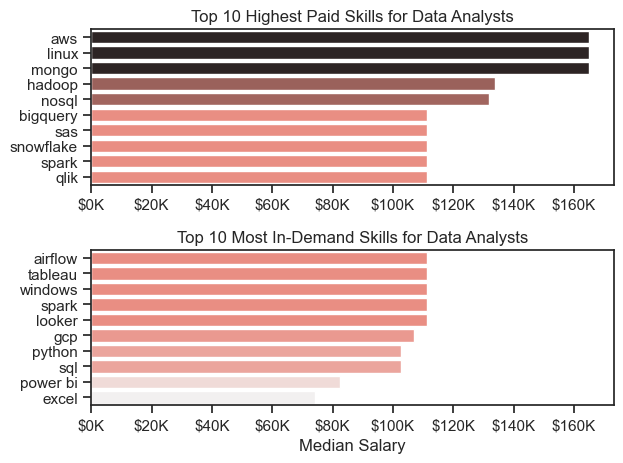

In [11]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:salmon_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:salmon')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()